# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 587


---

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city (ref = https://openweathermap.org/current#min, https://openweathermap.org/faq#:~:text=Temperature%20is%20available%20in%20Fahrenheit,units%20parameter%20in%20API%20calls.)
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric" # Set units to metric to retrive temperature in Celsius (Unit Default: Kelvin, Metric: Celsius, Imperial: Fahrenheit)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, lon[gitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | invercargill
Processing Record 4 of Set 1 | aasiaat
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | vorkuta
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | udachny
Processing Record 9 of Set 1 | puerto natales
Processing Record 10 of Set 1 | shijiang
Processing Record 11 of Set 1 | hawaiian paradise park
Processing Record 12 of Set 1 | papatowai
Processing Record 13 of Set 1 | utrik
Processing Record 14 of Set 1 | georgetown
Processing Record 15 of Set 1 | namibe
Processing Record 16 of Set 1 | port elizabeth
Processing Record 17 of Set 1 | whitehorse
Processing Record 18 of Set 1 | tiksi
Processing Record 19 of Set 1 | qaisumah
Processing Record 20 of Set 1 | basoko
Processing Record 21 of Set 1 | port saint john's
Processing Record 22 of Set 1 | grytviken
Processi

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,25.05,83,100,4.99,PN,1710405785
1,ushuaia,-54.8000,-68.3000,4.81,81,20,4.63,AR,1710405805
2,invercargill,-46.4000,168.3500,10.57,93,99,3.13,NZ,1710405805
3,aasiaat,68.7098,-52.8699,-19.42,99,100,1.39,GL,1710405806
4,bethel,41.3712,-73.4140,6.23,83,0,0.97,US,1710405806


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,25.05,83,100,4.99,PN,1710405785
1,ushuaia,-54.8000,-68.3000,4.81,81,20,4.63,AR,1710405805
2,invercargill,-46.4000,168.3500,10.57,93,99,3.13,NZ,1710405805
3,aasiaat,68.7098,-52.8699,-19.42,99,100,1.39,GL,1710405806
4,bethel,41.3712,-73.4140,6.23,83,0,0.97,US,1710405806


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

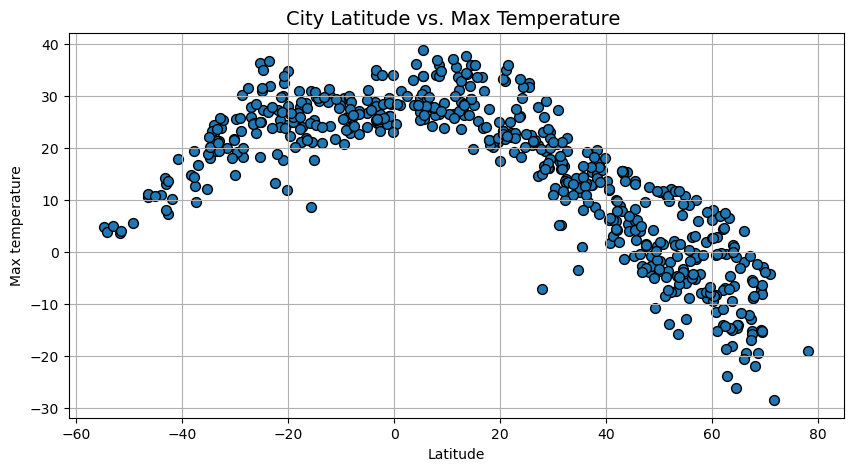

In [10]:
# Build scatter plot for latitude vs. temperature

plt.figure(figsize=(10,5))
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o', edgecolors='black', s=[50])

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature ', fontsize = 14)
plt.ylabel('Max temperature', fontsize = 10)
plt.xlabel('Latitude', fontsize = 10)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

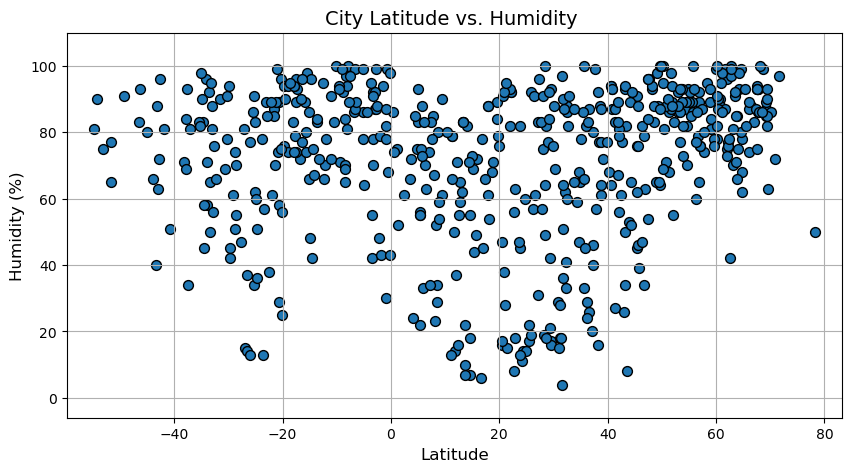

In [11]:
plt.figure(figsize=(10,5))
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o', edgecolors='black', s=[50])

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity ', fontsize = 14)
plt.ylabel('Humidity (%)', fontsize = 12)
plt.xlabel('Latitude', fontsize = 12)
plt.grid()

# Set the limits of the y axis:
plt.ylim(min(city_data_df['Humidity'])-10, max(city_data_df['Humidity'])+10)

# Set the limits of the x axis:
plt.xlim(min(city_data_df['Lat'])-5, max(city_data_df['Lat'])+5)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

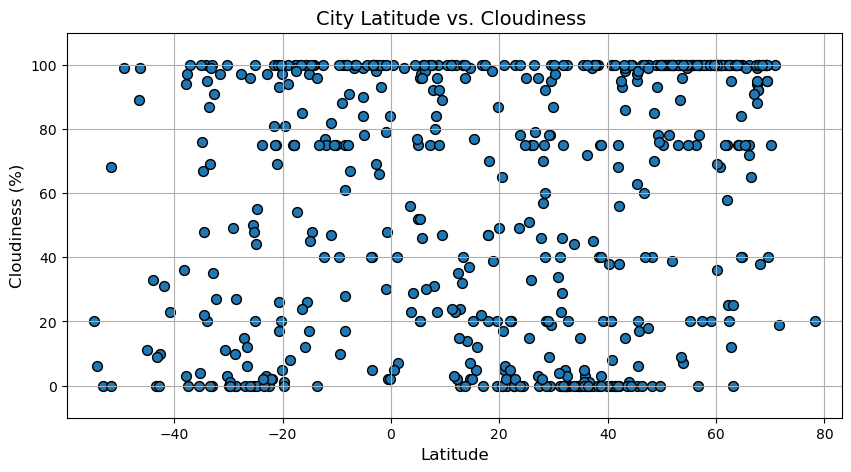

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10,5))
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o', edgecolors='black', s=[50])

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness ', fontsize = 14)
plt.ylabel('Cloudiness (%)', fontsize = 12)
plt.xlabel('Latitude', fontsize = 12)
plt.grid()

# Set the limits of the y axis:
plt.ylim(min(city_data_df['Cloudiness'])-10, max(city_data_df['Humidity'])+10)

# Set the limits of the x axis:
plt.xlim(min(city_data_df['Lat'])-5, max(city_data_df['Lat'])+5)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

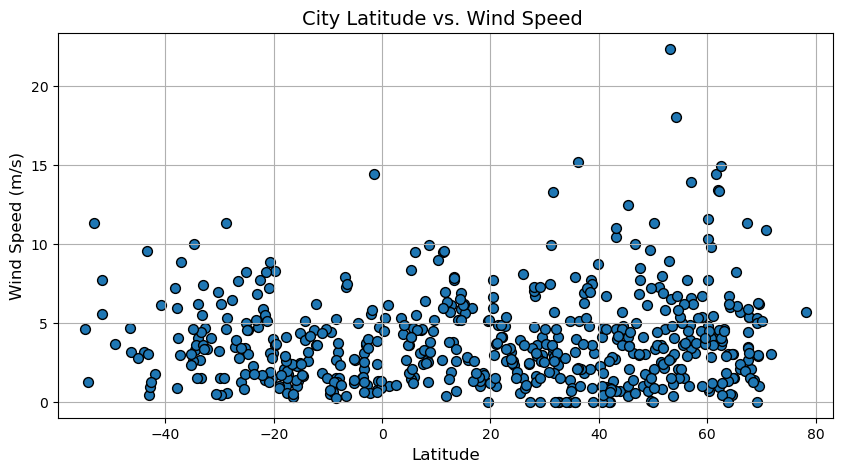

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(10,5))
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o', edgecolors='black',  s=[50])

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed ', fontsize = 14)
plt.ylabel('Wind Speed (m/s)', fontsize = 12)
plt.xlabel('Latitude', fontsize = 12)
plt.grid()

# Set the limits of the y axis:
plt.ylim(min(city_data_df['Wind Speed'])-1, max(city_data_df['Wind Speed'])+1)

# Set the limits of the x axis:
plt.xlim(min(city_data_df['Lat'])-5, max(city_data_df['Lat'])+5)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:
# Define a function to create Linear Regression plots
def lin_regression(x,y,p):

    # Linear Regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

    # Regression values
    regress_values = x * slope + intercept

    # Line equation
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.figure(figsize=(10,5))
    plt.scatter(x, y, marker='o', s=[50])
    plt.plot(x, regress_values, "black")
    plt.annotate(line_eq, xy=(min(x+2),min(y+2)), fontsize=15, color="black")
    plt.xlabel('Latitude')
    plt.ylabel(f'{p}')
    plt.title('')
    plt.show()
    
    print(f"The r-squared is: {rvalue**2}")

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,aasiaat,68.7098,-52.8699,-19.42,99,100,1.39,GL,1710405806
4,bethel,41.3712,-73.4140,6.23,83,0,0.97,US,1710405806
5,vorkuta,67.5000,64.0000,-15.17,93,94,3.45,RU,1710405807
7,udachny,66.4167,112.4000,-19.51,88,65,2.11,RU,1710405808
9,shijiang,27.0819,110.7933,14.58,83,96,2.39,CN,1710405809


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,25.05,83,100,4.99,PN,1710405785
1,ushuaia,-54.8000,-68.3000,4.81,81,20,4.63,AR,1710405805
2,invercargill,-46.4000,168.3500,10.57,93,99,3.13,NZ,1710405805
6,port-aux-francais,-49.3500,70.2167,5.54,91,99,3.66,TF,1710405807
8,puerto natales,-51.7236,-72.4875,3.69,77,68,5.57,CL,1710405808


###  Temperature vs. Latitude Linear Regression Plot

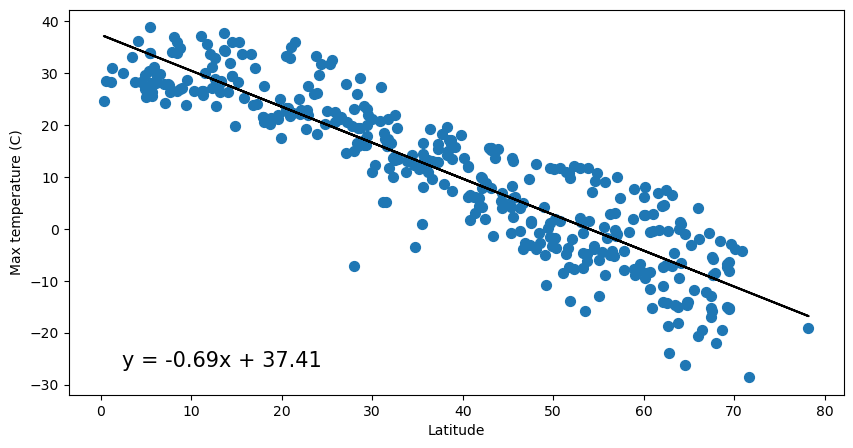

The r-squared is: 0.8197500898768703


In [20]:
# Linear regression on Northern Hemisphere
lin_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Max temperature (C)')

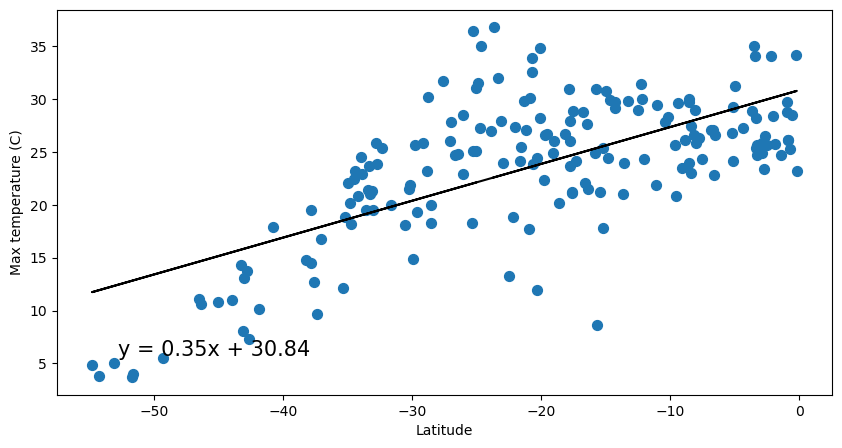

The r-squared is: 0.4623998617757035


In [21]:
# Linear regression on Southern Hemisphere
lin_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Max temperature (C)')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

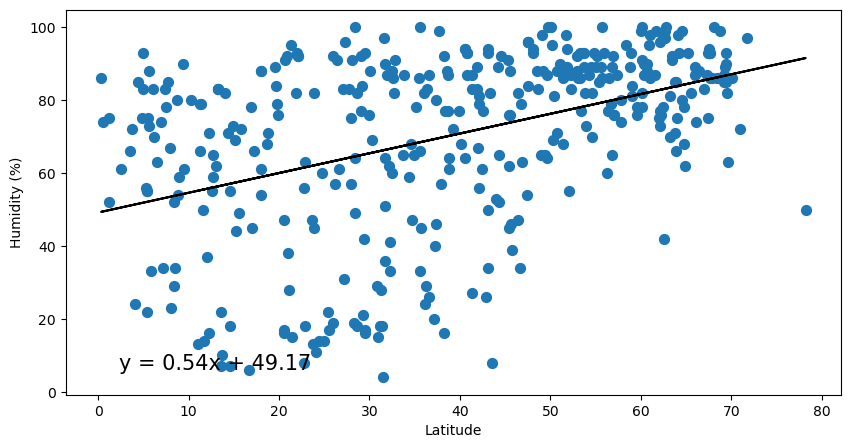

The r-squared is: 0.18492072718455255


In [22]:
# Northern Hemisphere
lin_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Humidity (%)')

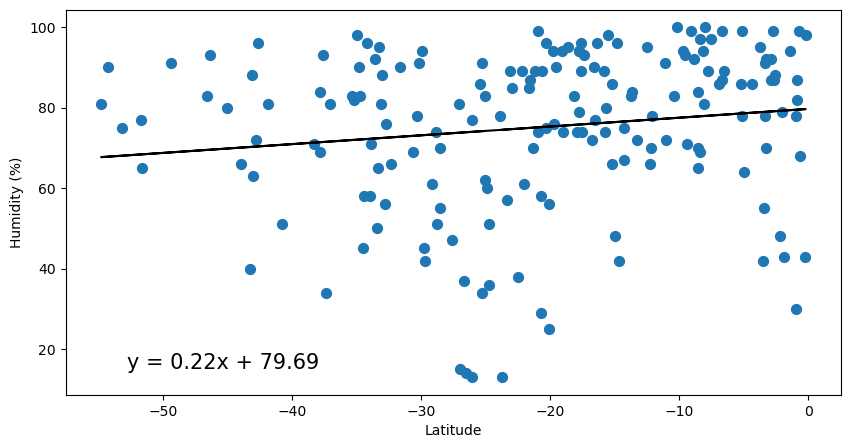

The r-squared is: 0.021713383802781924


In [23]:
# Southern Hemisphere
lin_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Humidity (%)')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

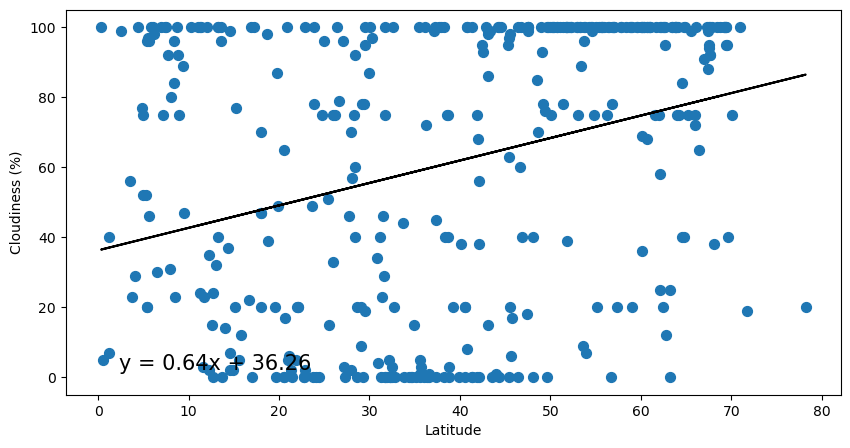

The r-squared is: 0.09794408868112839


In [24]:
# Northern Hemisphere
lin_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Cloudiness (%)')

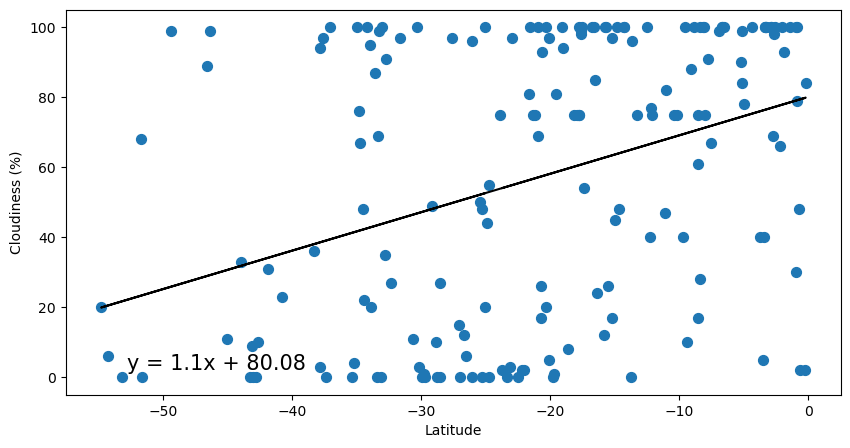

The r-squared is: 0.13857097982818328


In [25]:
# Southern Hemisphere
lin_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Cloudiness (%)')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

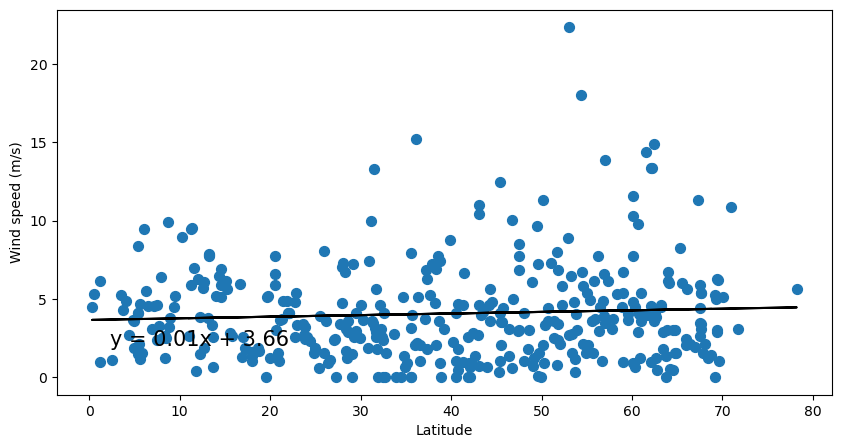

The r-squared is: 0.004217028545937632


In [29]:
# Northern Hemisphere
lin_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Wind speed (m/s)')

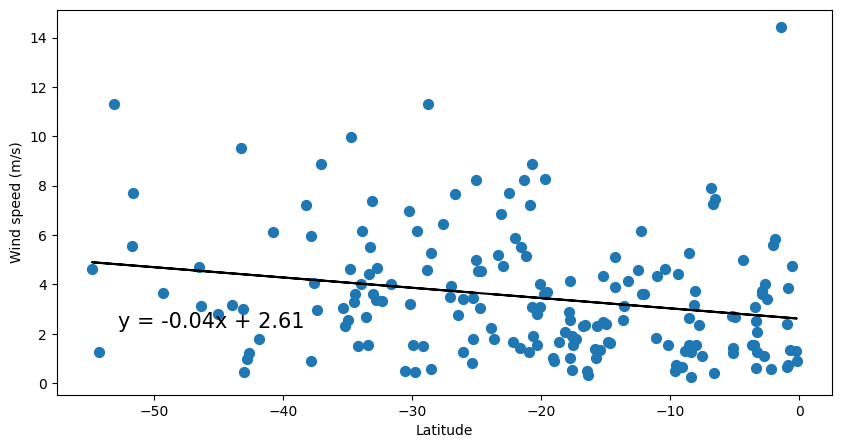

The r-squared is: 0.05110149058642666


In [30]:
# Southern Hemisphere
lin_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'],'Wind speed (m/s)')

**Discussion about the linear relationship:** YOUR RESPONSE HERE